#Data Augmentation To Address Overfitting In Flower Classification CNN

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 2s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/23894449029_bf0f34d35d_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/9651392844_77f90589ba_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/3594967811_697184b026_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/21821266773_7113d34c35_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4489516263_e49fe82637_n.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/7304710956_015b41f802_m.jpg'),
 PosixPath('datasets/flower_photos/roses/410425647_4586667858.jpg'),
 PosixPath('datasets/flower_photos/roses/8337607102_d9e0fa887e.jpg'),
 PosixPath('datasets/flower_photos/roses/8742493617_c2a9bf854f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3115889021_053f3b8e5a.jpg')]

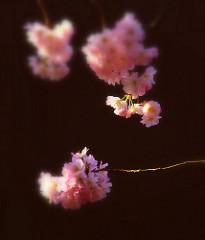

In [8]:
PIL.Image.open(str(roses[10]))

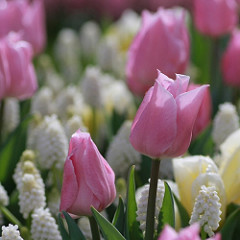

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[5]))

##Read flowers images from disk into numpy array using opencv

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/7304710956_015b41f802_m.jpg'),
 PosixPath('datasets/flower_photos/roses/410425647_4586667858.jpg'),
 PosixPath('datasets/flower_photos/roses/8337607102_d9e0fa887e.jpg'),
 PosixPath('datasets/flower_photos/roses/8742493617_c2a9bf854f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3115889021_053f3b8e5a.jpg')]

In [13]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/7304710956_015b41f802_m.jpg'

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [15]:
img.shape

(240, 180, 3)

In [16]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:
X = np.array(X)
y = np.array(y)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Preprocessing: scale images

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [20]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)      

Epoch 1/30
86/86 [==============================] - 10s 23ms/step - loss: 1.3468 - accuracy: 0.4270
Epoch 2/30
86/86 [==============================] - 2s 26ms/step - loss: 1.0312 - accuracy: 0.5956
Epoch 3/30
86/86 [==============================] - 2s 23ms/step - loss: 0.8270 - accuracy: 0.6784
Epoch 4/30
86/86 [==============================] - 2s 23ms/step - loss: 0.6009 - accuracy: 0.7812
Epoch 5/30
86/86 [==============================] - 2s 23ms/step - loss: 0.4273 - accuracy: 0.8521
Epoch 6/30
86/86 [==============================] - 2s 23ms/step - loss: 0.2698 - accuracy: 0.9062
Epoch 7/30
86/86 [==============================] - 2s 23ms/step - loss: 0.1395 - accuracy: 0.9513
Epoch 8/30
86/86 [==============================] - 2s 26ms/step - loss: 0.0744 - accuracy: 0.9804
Epoch 9/30
86/86 [==============================] - 2s 23ms/step - loss: 0.0400 - accuracy: 0.9924
Epoch 10/30
86/86 [==============================] - 2s 23ms/step - loss: 0.0285 - accuracy: 0.9938
Epoch 11

In [21]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 18ms/step - loss: 3.1218 - accuracy: 0.6656


[3.121824264526367, 0.6655773520469666]

In [22]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 1s 17ms/step


array([[  3.0663464,  14.744674 ,   1.8958471, -24.861095 ,  -3.8425996],
       [ 35.551342 ,  -2.8774226, -20.260464 , -17.514416 ,  16.48913  ],
       [ -1.1960168,   2.2403982,   8.92212  , -11.291    ,  -6.013916 ],
       ...,
       [-12.254497 ,  -5.722046 ,  -0.9954329,  18.834312 , -15.416595 ],
       [ 27.656757 , -17.373735 , -32.664997 ,   3.5714583,  25.00947  ],
       [  3.879042 ,  -9.327965 ,  -8.878833 ,  13.497951 ,  -6.0287366]],
      dtype=float32)

In [23]:
score = tf.nn.softmax(predictions[0])

In [24]:
np.argmax(score)

1

In [25]:
y_test[0]

1

In [52]:
data_augmentation = keras.Sequential(
  [
    #layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 #input_shape=(img_height, 
                                                             # img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

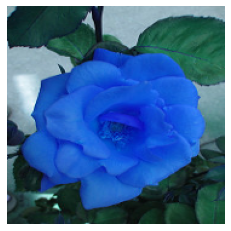

In [53]:
plt.axis('off')
plt.imshow(X[0])

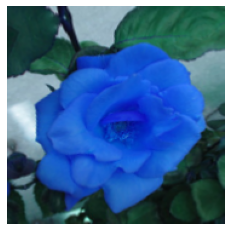

In [57]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [58]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30) 

Epoch 1/30
86/86 [==============================] - 4s 29ms/step - loss: 1.3774 - accuracy: 0.4146
Epoch 2/30
86/86 [==============================] - 2s 26ms/step - loss: 1.1065 - accuracy: 0.5494
Epoch 3/30
86/86 [==============================] - 2s 25ms/step - loss: 0.9956 - accuracy: 0.6072
Epoch 4/30
86/86 [==============================] - 2s 25ms/step - loss: 0.9651 - accuracy: 0.6225
Epoch 5/30
86/86 [==============================] - 2s 25ms/step - loss: 0.8538 - accuracy: 0.6704
Epoch 6/30
86/86 [==============================] - 2s 28ms/step - loss: 0.7918 - accuracy: 0.6973
Epoch 7/30
86/86 [==============================] - 2s 26ms/step - loss: 0.7460 - accuracy: 0.7078
Epoch 8/30
86/86 [==============================] - 2s 26ms/step - loss: 0.7219 - accuracy: 0.7224
Epoch 9/30
86/86 [==============================] - 2s 26ms/step - loss: 0.6665 - accuracy: 0.7380
Epoch 10/30
86/86 [==============================] - 2s 25ms/step - loss: 0.6189 - accuracy: 0.7580
Epoch 11/

In [59]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 16ms/step - loss: 1.2118 - accuracy: 0.7048


[1.2117897272109985, 0.7047930359840393]